# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import yfinance as yf
from MCForecastTools import MCSimulation
from datetime import datetime
from datetime import timedelta

%matplotlib inline

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [2]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [3]:
# Set URL's to retreive data
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [4]:
# Convert url data to json
response_btc = requests.get(btc_url).json()
response_eth = requests.get(eth_url).json()

In [5]:
# Fetch current BTC price
btc_value = response_btc['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_value = response_eth['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = btc_value * my_btc
my_eth_value = eth_value * my_eth

# Compute the value of the crypto portfolio
crypto_portfolio = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")
print(f"The current value of your crypto portfolio is ${crypto_portfolio:,.2f}")

The current value of your 1.2 BTC is $26,959.51
The current value of your 5.3 ETH is $8,605.72
The current value of your crypto portfolio is $35,565.23


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Using yfinance as Alpaca is not available in Canada

# Format current date
yesterday = datetime.now()-timedelta(days=1)
yesterday.isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Get current closing prices for SPY and AGG
df_ticker = yf.download(tickers, yesterday, yesterday)['Adj Close']

# Formate the DataFrame with correct headers
df_ticker = df_ticker.rename(columns={'AGG': 'close', 'SPY': 'close'})
header = [['AGG', 'SPY'], ['close', 'close']]
df_ticker.columns=header

# Preview DataFrame
df_ticker

[*********************100%***********************]  2 of 2 completed


,AGG,SPY
,close,close
Date,,
2022-12-29,97.449997,383.440002


In [8]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker.iloc[0]['AGG']['close']
spy_close_price = df_ticker.iloc[0]['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:,.2f}")
print(f"Current SPY closing price: ${spy_close_price:,.2f}")

Current AGG closing price: $97.45
Current SPY closing price: $383.44


In [9]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Compute the value of the share portfolio
share_portfolio = my_agg_value + my_spy_value

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your share portfolio is ${share_portfolio:,.2f}")

The current value of your 200 AGG shares is $19,490.00
The current value of your 50 SPY shares is $19,172.00
The current value of your share portfolio is $38,662.00


### Savings Health Analysis

In [10]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
amount = {'amount': [crypto_portfolio, share_portfolio]}

# Create savings DataFrame
df_savings = pd.DataFrame(amount)

# Setting Index
index = pd.Index(['crypto', 'shares'])
df_savings = df_savings.set_index(index)

# Display savings DataFrame
display(df_savings)

,amount
crypto,35565.229772
shares,38661.999512


<AxesSubplot:title={'center':'Savings Breakdown'}, ylabel='amount'>

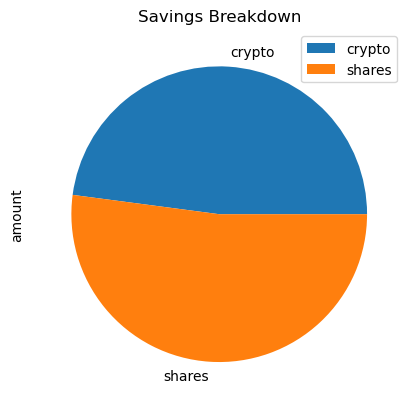

In [11]:
# Plot savings pie chart
df_savings.plot(kind='pie', y='amount', title='Savings Breakdown')

In [12]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_portfolio + share_portfolio

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund plus some contingency.")
elif total_savings == emergency_fund:
    print("Congratulations! You have just enough money in your emergency fund.")
else:
    shortfall = abs(total_savings - emergency_fund)
    print(f"Sorry, you are ${shortfall:,.2f} away from reaching your emergency fund goal.")


Congratulations! You have enough money in your emergency fund plus some contingency.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [13]:
# Set start and end dates of five years back from today.
start_date = datetime.now() - timedelta(days=5*365+2)
start_date.isoformat()


end_date = datetime.now() - timedelta(days=1)
end_date.isoformat()

print(start_date)
print(end_date)

2017-12-29 12:21:49.584103
2022-12-29 12:21:49.584257


In [19]:
# Get Ticker data
tickers = ["AGG", "SPY"]

# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = yf.download(tickers, start_date, end_date)['Adj Close']

# Reorganize the DataFrame
df_stock_data = df_stock_data.rename(columns={'AGG': 'close', 'SPY': 'close'})
header = [['AGG', 'SPY'], ['close', 'close']]
df_stock_data.columns=header

# Display sample data
df_stock_data.head()

[*********************100%***********************]  2 of 2 completed


,AGG,SPY
,close,close
Date,,
2017-12-29,97.050140,245.013000
2018-01-02,96.908150,246.766663
2018-01-03,96.917015,248.327423
2018-01-04,96.854881,249.374115
2018-01-05,96.792740,251.035934


In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns based on 40% AGG and 60% SPY
MC_thirty_year = MCSimulation(portfolio_data=df_stock_data, weights=[.40, .60], num_simulation=500, num_trading_days=252*30)

In [21]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                      SPY             
                close daily_return       close daily_return
Date                                                       
2017-12-29  97.050140          NaN  245.013000          NaN
2018-01-02  96.908150    -0.001463  246.766663     0.007157
2018-01-03  96.917015     0.000091  248.327423     0.006325
2018-01-04  96.854881    -0.000641  249.374115     0.004215
2018-01-05  96.792740    -0.000642  251.035934     0.006664

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 110.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 120.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 130.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 140.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 150.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 160.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 170.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 180.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 190.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 200.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 210.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 220.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 230.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 240.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 250.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 260.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 270.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 280.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 290.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 300.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 310.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 320.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 330.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 340.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 350.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 360.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 370.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 380.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 390.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 400.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 410.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 420.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 430.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 440.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 450.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 460.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 470.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 480.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 490.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996672,0.999293,1.001769,1.007808,0.995544,0.977576,1.002358,1.012229,1.002573,0.992626,...,0.986177,1.008140,0.993862,0.994149,0.994898,0.990655,1.000585,1.002152,1.001044,1.000225
2,0.997557,1.001419,0.997840,1.013549,1.015873,0.992504,1.009977,1.023356,0.992489,0.997078,...,0.983204,0.992781,0.982489,0.998812,0.995420,1.001280,0.994076,1.014865,0.979128,0.986499
3,1.006695,1.004143,1.001725,1.010225,1.011773,0.991060,1.012591,1.027301,0.994628,0.985743,...,0.979050,0.997773,0.990678,1.006261,0.991678,1.008643,0.999908,1.018917,0.979709,0.999102
4,1.009971,0.997544,1.008948,1.019130,1.009404,0.995218,1.012269,1.045355,0.999891,1.001138,...,0.980830,1.009691,0.999329,1.011114,1.005044,1.025571,1.007897,1.024388,0.971344,1.001052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.696755,10.983611,14.499872,4.720818,5.321411,8.379084,2.603158,3.124756,7.202856,4.413577,...,2.993925,12.235500,5.347595,10.886450,4.296627,3.786788,6.414111,3.399206,5.585415,2.426946
7557,4.760045,10.908397,14.669320,4.752346,5.404449,8.384478,2.552378,3.139020,7.160254,4.422522,...,2.975020,12.290343,5.397614,10.893372,4.320162,3.807098,6.403142,3.420122,5.579719,2.443739
7558,4.711276,10.992752,14.689860,4.783870,5.354612,8.360879,2.555357,3.189308,7.277712,4.372260,...,2.975085,12.392035,5.354250,10.903083,4.365455,3.755096,6.435151,3.449432,5.661154,2.467983
7559,4.734225,11.137786,14.638421,4.853278,5.375996,8.414408,2.533696,3.169047,7.235386,4.397549,...,2.993500,12.620655,5.327321,10.912064,4.244402,3.758052,6.482260,3.440765,5.608232,2.477265


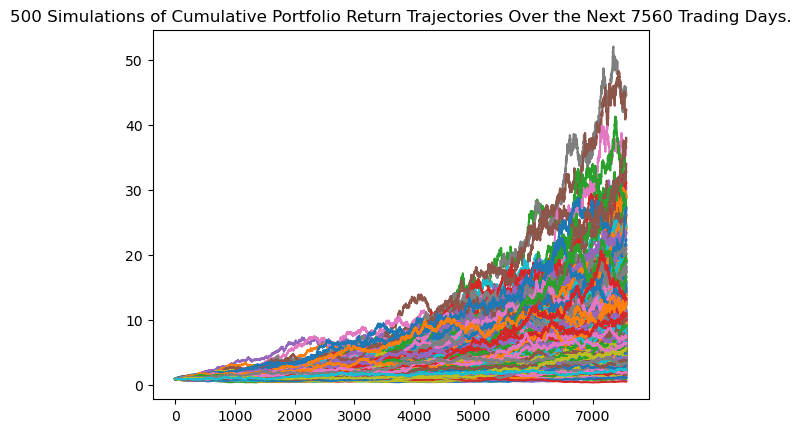

In [25]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

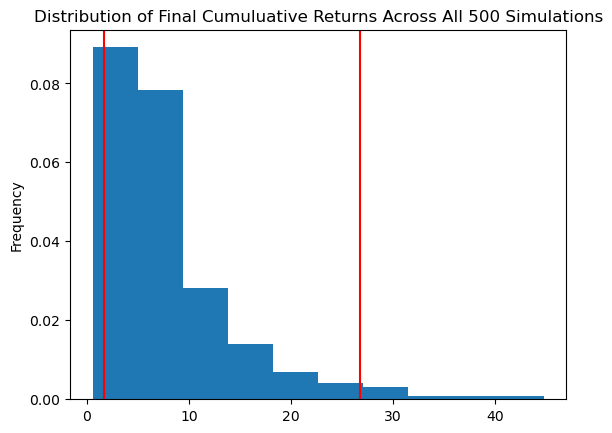

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              7.978258
std               6.448396
min               0.569425
25%               3.888461
50%               5.934127
75%               9.839605
max              44.770196
95% CI Lower      1.623637
95% CI Upper     26.777961
Name: 7560, dtype: float64


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = initial_investment * tbl[8]
ci_upper = initial_investment * tbl[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $32,472.74 and $535,559.21


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [33]:
# Set initial investment
increased_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = increased_initial_investment * tbl[8]
ci_upper = increased_initial_investment * tbl[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${increased_initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $48,709.11 and $803,338.82


## Early Retirement


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns based on 20% AGG and 80% SPY
MC_ten_year = MCSimulation(portfolio_data=df_stock_data, weights=[.20, .80], num_simulation=500, num_trading_days=252*10)

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 110.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 120.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 130.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 140.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 150.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 160.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 170.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 180.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 190.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 200.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 210.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 220.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 230.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 240.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 250.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 260.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 270.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 280.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 290.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 300.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 310.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 320.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 330.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 340.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 350.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 360.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 370.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 380.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 390.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 400.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 410.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 420.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 430.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 440.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 450.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 460.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 470.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 480.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 490.


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:117: PerformanceWarning: DataFrame

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990287,0.991092,1.016370,1.005552,1.001870,0.995413,1.002200,0.987260,1.028738,1.000279,...,1.006264,0.986474,0.999609,0.996799,0.987721,0.982565,0.986824,0.991284,1.006740,1.001681
2,0.976873,0.992612,1.009310,1.006066,0.990939,0.978287,1.006398,0.995142,1.009928,0.974571,...,1.028522,0.981294,1.000853,1.005485,0.974436,0.990266,0.982929,1.000919,1.010751,1.024936
3,0.976937,0.989218,0.999720,1.017582,1.000294,0.983752,1.010707,1.000053,1.003152,0.985084,...,1.035475,1.000485,1.011357,0.993801,0.971185,0.988797,0.979299,0.989415,1.016044,1.024738
4,0.966464,0.974473,0.998611,1.005538,1.008593,0.961502,0.994218,0.989445,1.019307,1.003429,...,1.027753,1.011721,1.016331,0.997686,0.976360,0.998840,0.973922,0.981668,1.006705,1.006958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.212349,2.191795,1.632351,1.029124,2.040756,2.378160,3.882053,1.769698,2.634265,0.870491,...,1.997033,9.786969,4.584879,1.625930,1.254349,1.223957,2.076374,1.211691,1.433372,1.219916
2517,1.215826,2.158454,1.657847,1.043150,2.041895,2.415803,3.872236,1.784453,2.642685,0.869794,...,2.013004,9.915721,4.624507,1.634396,1.274974,1.213994,2.082089,1.220633,1.433375,1.226808
2518,1.224742,2.171804,1.646826,1.045906,2.073017,2.437399,3.914894,1.786811,2.613004,0.867915,...,2.014951,10.155945,4.740417,1.658788,1.289880,1.210801,2.102173,1.240918,1.460926,1.233987
2519,1.225397,2.133440,1.658357,1.051799,2.111668,2.405989,3.929462,1.792563,2.612226,0.864044,...,2.004073,10.162421,4.773049,1.635990,1.309703,1.215998,2.110308,1.238703,1.458790,1.212402


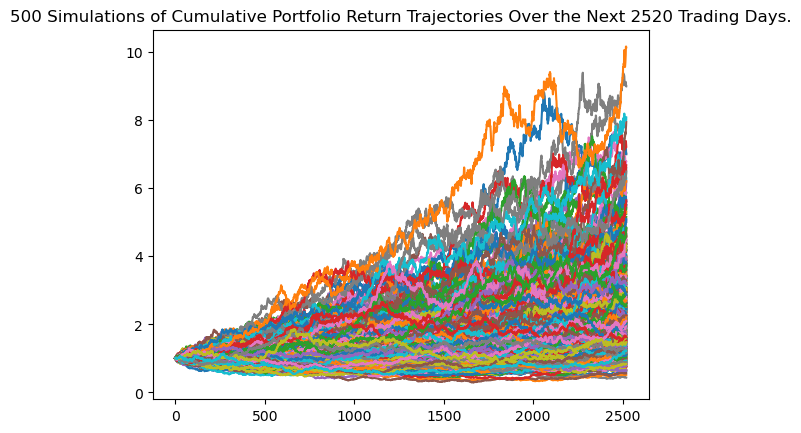

In [36]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

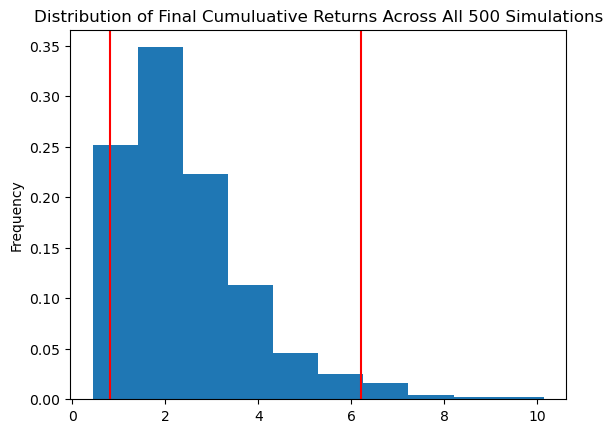

In [37]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_tenyear = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_tenyear)

count           500.000000
mean              2.425314
std               1.403963
min               0.438662
25%               1.432868
50%               2.066615
75%               3.036220
max              10.135911
95% CI Lower      0.800979
95% CI Upper      6.204411
Name: 2520, dtype: float64


/Users/jennmacbookpro/Desktop/FinTechCourse/Week 5 - APIs/Submission/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55
